In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import altair as alt

In [4]:
df = pd.read_csv('pracuj(3).csv', sep=',')

In [5]:
df = df.dropna(axis=1, how='all')

In [6]:
json_cols = ['technologies']

for col in json_cols:
    df[col] = df[col].apply(json.loads)

In [7]:
df.head()

web-scraper-order                              web-scraper-start-url  \
0      1743533074-1  https://it.pracuj.pl/praca?its=ai-ml%2Cbig-dat...   
1      1743533077-2  https://it.pracuj.pl/praca?its=ai-ml%2Cbig-dat...   
2      1743533080-3  https://it.pracuj.pl/praca?its=ai-ml%2Cbig-dat...   
3      1743533083-4  https://it.pracuj.pl/praca?its=ai-ml%2Cbig-dat...   
4      1743533085-5  https://it.pracuj.pl/praca?its=ai-ml%2Cbig-dat...   

                                  Article Links-href  \
0  https://www.pracuj.pl/praca/developer-sharepoi...   
1  https://www.pracuj.pl/praca/architekt-analityk...   
2  https://www.pracuj.pl/praca/senior-mid-full-st...   
3  https://www.pracuj.pl/praca/platny-staz-w-wydz...   
4  https://www.pracuj.pl/praca/data-engineer-gcp-...   

                                               title  \
0              Developer Sharepoint / Power Platform   
1        Architekt / Analityk Systemowo - Biznesowy​   
2  Senior/Mid Full Stack Developer (Backend-Orien...   
3       Płatny staż w Wydziale Utrzymania Integracji   
4                                  Data Engineer GCP   

                                     specializations  \
0                       Business analytics, Frontend   
1                   Architecture, Business analytics   
2  Architecture, Backend, Business analytics, Dev...   
3                            Big Data / Data Science   
4                            Big Data / Data Science   

                                     responsibilites  \
0  [{"responsibilites":"Tworzenie i rozwój aplika...   
1  [{"responsibilites":"Współtworzenie ekosystemu...   
2  [{"responsibilites":"Designing and developing ...   
3  [{"responsibilites":"Nadzór nad mechanizmami i...   
4  [{"responsibilites":"Analizowanie biznesowych ...   

                                        requirements  \
0  [{"requirements":"Min. 2 lata doświadczenia w ...   
1  [{"requirements":"Wykształcenie wyższe, prefer...   
2  [{"requirements":"At least 4 years of experien...   
3  [{"requirements":"Podstawowa znajomość tematyk...   
4  [{"requirements":"Cztery lata doświadczenia w...   

                                        technologies salary  \
0  [{'technologies': 'Microsoft SQL Server', 'tec...    NaN   
1  [{'technologies': 'CRM', 'technologies-data-te...    NaN   
2  [{'technologies': 'Microsoft Azure', 'technolo...    NaN   
3  [{'technologies': 'SQL', 'technologies-data-te...    NaN   
4  [{'technologies': 'SQL', 'technologies-data-te...    NaN   

                                     employment-type    schedule  
0                        specjalista (Mid / Regular)  pełny etat  
1                                            ekspert  pełny etat  
2                         senior specialist (Senior)   full-time  
3                              praktykant / stażysta  pełny etat  
4  specjalista (Mid / Regular), starszy specjalis...  pełny etat

In [8]:
df = df.drop(['web-scraper-start-url', 'web-scraper-order', 'Article Links-href'], axis=1)

In [9]:
#one hot encoding
df['data_science'] = df['specializations'].apply(lambda x: 'Data Science' in x)
df['machine_learning'] = df['specializations'].apply(lambda x: 'ML' in x)
df['business_analytics'] = df['specializations'].apply(lambda x: 'Business analytics' in x)

In [10]:
df['employment-type'].unique()

array(['specjalista (Mid / Regular)', 'ekspert',
       'senior specialist (Senior)', 'praktykant / stażysta',
       'specjalista (Mid / Regular), starszy specjalista (Senior)',
       'specjalista (Mid / Regular), młodszy specjalista (Junior)',
       'starszy specjalista (Senior)',
       'specialist (Mid / Regular), senior specialist (Senior)',
       'asystent, młodszy specjalista (Junior)',
       'specialist (Mid / Regular)', 'kierownik / koordynator',
       'młodszy specjalista (Junior)', 'menedżer',
       'senior specialist (Senior), expert', 'junior specialist (Junior)',
       'starszy specjalista (Senior), ekspert', 'trainee', 'director',
       'specialist (Mid / Regular), junior specialist (Junior)',
       'team manager', 'manager / supervisor, team manager', 'expert',
       'manager / supervisor', 'praktykant / stażysta, asystent',
       'dyrektor, menedżer', 'kierownik / koordynator, menedżer',
       'assistant', 'trainee, assistant'], dtype=object)

In [11]:
def experience_level(str):
    if 'Senior' in str:
        return 'Senior'
    if 'Junior' in str:
        return 'Junior'
    if 'Mid' in str:
        return 'Mid'
    if 'praktykant' in str or 'trainee' in str or 'assistant' in str:
        return 'Intern'
    if  'menedżer' in str or 'manager' in str or 'kierownik' in str or 'director' in str: 
        return 'Manager'
    if 'ekspert' in str or 'expert' in str:
        return 'Expert'


In [12]:
df['experience_level'] = df['employment-type'].apply(experience_level)

In [13]:
df['experience_level'] = pd.Categorical(df['experience_level'],
                                        categories=['Intern', 'Junior', 'Mid', 'Senior', 'Manager', 'Expert'],
                                        ordered=True)

In [14]:
counts = pd.DataFrame({
'data_science': df[df['data_science'] == True].value_counts(['experience_level']).sort_index(),
'machine_learning': df[df['machine_learning'] == True].value_counts(['experience_level']).sort_index(),
'business_analytics': df[df['business_analytics'] == True].value_counts(['experience_level']).sort_index()
})

In [15]:
counts_reset = counts.reset_index().rename(columns={'index': 'experience_level'})
experience_order = ['Intern', 'Junior', 'Mid', 'Senior']

# Step 2: Melt the DataFrame to long format
counts_long = counts_reset.melt(
    id_vars='experience_level',
    var_name='specialization',
    value_name='job_count'
)

# Step 3: Create the grouped bar chart
alt.Chart(counts_long).mark_bar().encode(
    x=alt.X('experience_level:N', 
            sort=experience_order,  # Set custom sort order here
            title='Experience Level'),
    y=alt.Y('job_count:Q', title='Number of Job Offers'),
    color=alt.Color('specialization:N', title='Specialization'),
    order=alt.Order(
    'specialization:N',
    sort='ascending'  # or 'descending'
),
).properties(
    width=800,  # Width per facet
    height=600,
    title='Job Offers by Experience Level and Specialization'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).configure_legend(
    labelFontSize=12,
    titleFontSize=14
)

alt.Chart(...)

In [16]:
def technologies_list(row):
    tech_list = []
    for tech in row:
        tech_list.append(tech['technologies'])
    return tech_list

In [17]:
df['technologies'] = df['technologies'].apply(technologies_list)

In [18]:
tech_used = df.explode('technologies')

In [19]:
radio = alt.binding_radio(options=['Intern', 'Junior', 'Mid', 'Senior'], name='Experience Level')
var = alt.param(value='Intern', bind=radio)

top_n = 20
top_tech = tech_used['technologies'].value_counts().nlargest(top_n).index.tolist()
title = alt.Title(alt.expr(f'"Top 20 technologii na poziomie: " + {var.name}'))


filtered_tech = tech_used[tech_used['technologies'].isin(top_tech)]

# Create the chart with the filtered data
alt.Chart(filtered_tech).mark_bar().encode(
    x=alt.X('technologies', sort='-y'),
    y=alt.Y('count()'),
    color='technologies',
).properties(
    width=800,
    height=400,
    title = title
).interactive().configure_mark(
    opacity=0.8,
    strokeWidth=2
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=24
).add_params(
    var
).transform_filter(
    alt.datum.experience_level == var
)

alt.Chart(...)

In [20]:
alt.Chart(df[df['salary'].isna()]).mark_bar().encode(
    x=alt.X('experience_level'),
    y=alt.Y('count()'),
).properties(
    width=800,
    height=400,
    title='Brak podanej pensji w ogłoszeniu'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=24

)

alt.Chart(...)

In [21]:
import re

def salary_num(row):
    try:
        cleaned_values = []
        for val in row:
            cleaned_val = re.sub(r'[^\d.]', '', val.replace(',', '.'))
            cleaned_values.append(float(cleaned_val))
        
        if len(cleaned_values) == 1:
            return cleaned_values[0]
        else:
            return sum(cleaned_values) / len(cleaned_values)
    except Exception as e:
        print(f"Error with value {row}: {e}")
        return None
    
def normalize_salary(row):
    if row < 500:
        return row * 8 * 30
    if row > 70_000:
        return row / 12
    return row

In [22]:
df['norm_salary'] = df[df['salary'].notna()]['salary'].apply(lambda x: x.replace('zł', '').split('–')).apply(salary_num).apply(normalize_salary)


In [23]:
alt.Chart(df[df['norm_salary'].notna()]).mark_bar().encode(
    x=alt.X('norm_salary', bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()'),
    color= alt.Color('experience_level', 
                     title='Experience Level', 
                     scale=alt.Scale(scheme='rainbow'))
).properties(
    width=800,
    height=400,
    title='Wynagrodzenie w PLN'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=24
)

alt.Chart(...)

In [24]:
tech_used = df.explode('technologies')
tech_salary = tech_used[tech_used['norm_salary'].notna()].groupby('technologies')['norm_salary'].mean().reset_index()

top_tech_by_salary = tech_salary.sort_values('norm_salary', ascending=False).head(20)

alt.Chart(top_tech_by_salary).mark_bar().encode(
    x=alt.X('technologies:N', sort='y', title='Technology'),
    y=alt.Y('norm_salary:Q', title='Average Salary (PLN)'),
    color=alt.Color('technologies:N'),  
    tooltip=[
        alt.Tooltip('technologies:N', title='Technology'),
        alt.Tooltip('norm_salary:Q', title='Average Salary (PLN)', format=',.0f')
    ]
).properties(
    width=800,
    height=400,
    title='Top 20 najgorzej płatnych technologii (PLN)'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=24
).configure_legend(
    disable=True 
)

alt.Chart(...)

In [25]:
df[df['business_analytics']]['norm_salary'].describe()

count       84.000000
mean     23777.869048
std      11008.691188
min       4700.000000
25%      16375.000000
50%      23050.000000
75%      30000.000000
max      51600.000000
Name: norm_salary, dtype: float64

(np.float64(-1.0999943453176668),
 np.float64(1.0999986708727845),
 np.float64(-1.0999992880382499),
 np.float64(1.0999999660970596))

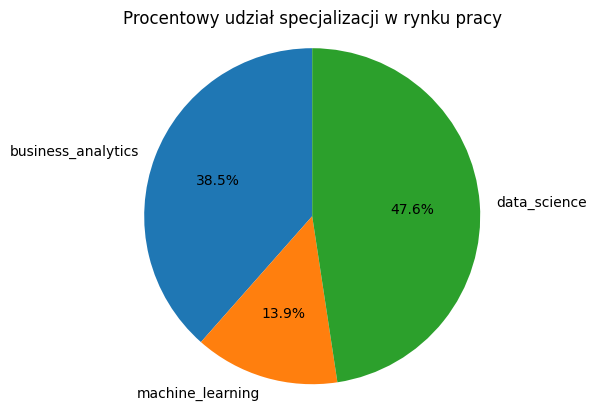

In [26]:
rynek = pd.DataFrame([
    df['business_analytics'].value_counts()[True], 
    df['machine_learning'].value_counts()[True], 
    df['data_science'].value_counts()[True]
], index=['business_analytics', 'machine_learning', 'data_science'], columns=['count'])
rynek.reset_index(inplace=True)

plt.pie(rynek['count'], labels=rynek['index'], autopct='%1.1f%%', startangle=90)
plt.title('Procentowy udział specjalizacji w rynku pracy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

## Analiza semantyczna

In [29]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim

model = SentenceTransformer("sdadas/mmlw-retrieval-roberta-base")

In [30]:
df['embedded_requirements'] = df['requirements'].apply(lambda x: model.encode(x, convert_to_tensor=True, show_progress_bar=False))

In [31]:
queries = [
    'Wymagane mniej niż rok doświadczenia',
    'Wymagany rok doświadczenia',
    'Wymagany 2 lata doświadczenia',
    'Wymagany 3 lata doświadczenia',
    'Wymagany 4 lata doświadczenia',
    'Więcej niż 4 lat doświadczenia',
]

queries_emb = model.encode(queries, convert_to_tensor=True, show_progress_bar=False)

In [63]:
from torch import topk

def years_requierd(row, queries_emb):
    sim = cos_sim(row, queries_emb)
    return str(topk(sim, k=1, dim=1).indices.tolist()[0][0])

In [64]:
years_requierd(df['embedded_requirements'][0], queries_emb)

'3'

In [65]:
df['years_rquired'] = df['embedded_requirements'].apply(lambda x: years_requierd(x, queries_emb))

In [66]:
alt.Chart(df[['years_rquired']]).mark_bar().encode(
    x=alt.X('years_rquired', title='Years of Experience Required'),
    y=alt.Y('count()'),
    color=alt.Color('years_rquired:N', title='Years of Experience Required'),
).properties(
    width=800,
    height=400,
    title='Years of Experience Required'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=24
)

alt.Chart(...)